This Jupyter notebook demonstrates how to use the SHERPA-simulation model suite to quantitatively assess air quality improvements under a given emission reduction suggested by Knowledge Graph and Retrieval-Augmented Generation. We'll load a customised reduction_matrix from KG interface folder, apply it using Module 1, and then visualize the resulting concentration improvements (ΔC).

Make sure you've cloned the SHERPA folder and installed all dependencies using environment.yml (conda), including netCDF4, numpy, matplotlib, and other relevant packages. Activate your environment before proceeding.

In [1]:
#import required libraries
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
from module1 import module1
from module3 import module3a, module3b
from map_visualise import plot_area_mask, plot_concentration_map

In [2]:
#load basecase emissions 
path_emission_cdf_test = './input/BC_emiss/BCemis_emepV4_45_cams61_withCond_01005_2019_SecEmis.nc'
emis = xr.open_dataset(path_emission_cdf_test)
emis

<xarray.Dataset>
Dimensions:     (longitude: 521, latitude: 781, GNFRsector: 12)
Coordinates:
  * longitude   (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude    (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
  * GNFRsector  (GNFRsector) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    NOx         (GNFRsector, latitude, longitude) float32 ...
    NMVOC       (GNFRsector, latitude, longitude) float32 ...
    NH3         (GNFRsector, latitude, longitude) float32 ...
    PPM25       (GNFRsector, latitude, longitude) float32 ...
    PPMco       (GNFRsector, latitude, longitude) float32 ...
    PPM10       (GNFRsector, latitude, longitude) float32 ...
    SOx         (GNFRsector, latitude, longitude) float32 ...

In [3]:
#load basecase concentrations
path_base_conc_cdf_test = './input/BC_concs/BCconc_emepV4_45_cams61_withCond_01005_2019_SURF_ug_PM25_rh50.nc'
conc = xr.open_dataset(path_base_conc_cdf_test)
conc

<xarray.Dataset>
Dimensions:    (longitude: 521, latitude: 781)
Coordinates:
  * longitude  (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude   (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
Data variables:
    conc       (latitude, longitude) float32 ...

In [4]:
#load the SRR model
path_model_cdf_test = './input/SRR/SR_SURF_ug_PM25_rh50.nc' 
srr = xr.open_dataset(path_model_cdf_test)
srr

<xarray.Dataset>
Dimensions:  (latitude: 781, longitude: 521, pollutant: 5)
Dimensions without coordinates: latitude, longitude, pollutant
Data variables:
    lat      (latitude, longitude) float64 ...
    lon      (latitude, longitude) float64 ...
    alpha    (pollutant, latitude, longitude) float64 ...
    omega    (pollutant, latitude, longitude) float64 ...
Attributes: (12/14)
    date_of_production:                  Fri Apr  7 11:13:32 2023
    flag_weight_used:                    False
    step1_receptor_window:               0
    step1_area_of_influence:             25
    step1_algorithm_for_training:        omega slidind per pollutant, compute...
    step1_omega_physical_intepretation:  omega specifies the slope of the bel...
    ...                                  ...
    step2_algorithm_for_training:        alpha optimized per cell, all scenar...
    step2_alpha_physical_intepretation:  alpha specifies the precursor relati...
    flag_used_to_mask_sea_cells:         input/emepV4_45_cams61_withCond_0100...
    name_of_the_test:                    20230407_rad25-100_rf_3-0Sec_Emi_Var...
    Order_Pollutant:                     NOx, NMVOC, NH3, PPM25, SOx
    Radius_of_influence:                 100

In [5]:
#define reduction area
path_area_cdf_test = './input/reduction_areas/emiRedOn_01005_London_FUA.nc'
area = xr.open_dataset(path_area_cdf_test)
area

<xarray.Dataset>
Dimensions:    (longitude: 521, latitude: 781)
Coordinates:
  * longitude  (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude   (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
Data variables:
    AREA       (latitude, longitude) float32 ...

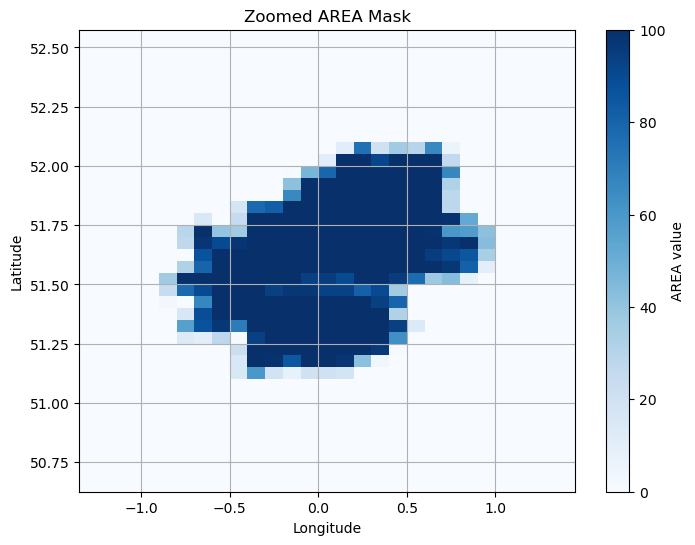

In [6]:
plot_area_mask(area['AREA'], title="Zoomed AREA Mask", padding=0.5)

In [7]:
#define percentage reductions suggested by KG
path_reduction_txt_test = './input/reduction_perc/user_reduction_GNFR_all_PPM25.txt'#user_reduction_GNFR_all.txt'
pd.read_csv(path_reduction_txt_test, sep='\t')

,POLL,GNFR1,GNFR2,GNFR3,GNFR4,GNFR5,GNFR6,GNFR7,GNFR8,GNFR9,GNFR10,GNFR11,GNFR12
0,NOx,35,35,35,35,35,35,35,35,35,35,35,35
1,NMVOC,35,35,35,35,35,35,35,35,35,35,35,35
2,NH3,35,35,35,35,35,35,35,35,35,35,35,35
3,PPM10,35,35,35,35,35,35,35,35,35,35,35,35
4,PPM25,35,35,35,35,35,35,35,35,35,35,35,35
5,SOx,35,35,35,35,35,35,35,35,35,35,35,35


In [8]:
#define output area and downscaling (not implemented now)
path_result_cdf_test = './output/'
downscale_request = 0 # 0 if you do not need downscale, 1 if you need downscale but only for PM concentrations

In [9]:
#run the model and inspect the results
res = module1(path_emission_cdf_test, path_area_cdf_test, path_reduction_txt_test, path_base_conc_cdf_test, path_model_cdf_test, path_result_cdf_test,
                downscale_request)

/opt/anaconda3/envs/py310-sherpa/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/py310-sherpa/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


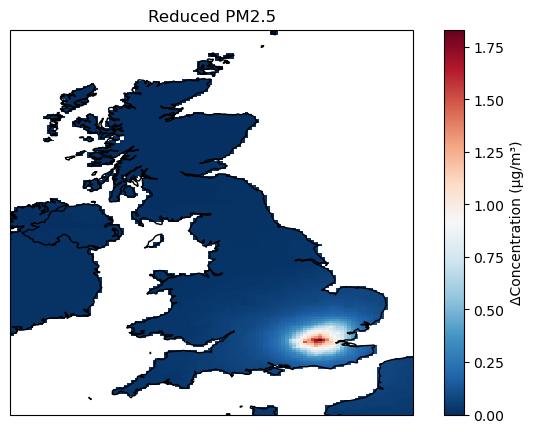

In [10]:
#show content of result file
pm25_delta_conc = xr.open_dataset('output/DCconc_emepV434_camsV42_SURF_ug_PM25_rh50.nc')
plot_concentration_map(pm25_delta_conc['delta_conc'], title ="Reduced PM2.5")

In [11]:
from module3 import module3a, module3b

# Paths to input files
path_reduction_txt_source = './input/reduction_perc/reduction_matrix_all_20pct.txt'
downscale = False  # or True if downscaling is required

# === Sector-based source allocation ===
module3a(path_emission_cdf_test, path_area_cdf_test, path_reduction_txt_source, path_base_conc_cdf_test, path_model_cdf_test, path_result_cdf_test,
                downscale_request)
ds = xr.open_dataset('output/potencies_overview_per_sector.nc')

/opt/anaconda3/envs/py310-sherpa/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/py310-sherpa/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


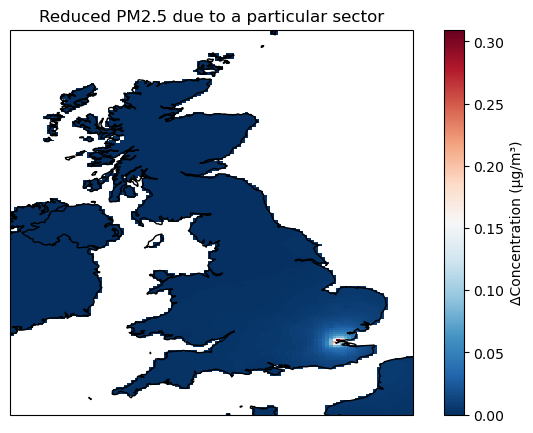

In [12]:
sector_id = 7  # GNFR sector number (1–12)

# Subset by GNFRsector
dc_sector = ds['DC_alpha_snap'].sel(GNFRsector=sector_id)

# Optional: clip to UK region
uk_dc_sector = dc_sector.sel(
    latitude=slice(49.5, 60.0),
    longitude=slice(-8.5, 2.5)
)

plot_concentration_map(dc_sector, title ="Reduced PM2.5 due to a particular sector")

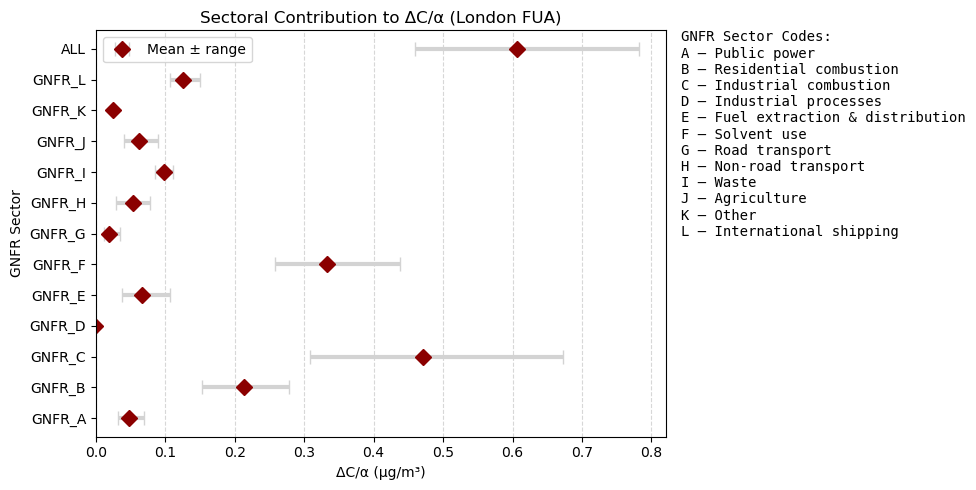

In [13]:
mask_ds = xr.open_dataset("input/reduction_areas/emiRedOn_01005_London_FUA.nc")
mask_raw = mask_ds["AREA"].load()
mask = mask_raw.interp_like(ds["DC_alpha_all"], method="nearest")

mask_3d = mask.expand_dims(dim={"GNFRsector": ds.dims["GNFRsector"]}).transpose("GNFRsector", "latitude", "longitude")
dc_alpha_snap = ds["DC_alpha_snap"].load()
mask_3d = mask_3d.load()
london_snap = dc_alpha_snap.where(mask_3d == 1)

mean_london = london_snap.mean(dim=["latitude", "longitude"], skipna=True)
min_london = london_snap.min(dim=["latitude", "longitude"], skipna=True)
max_london = london_snap.max(dim=["latitude", "longitude"], skipna=True)

sectors = [f"GNFR_{chr(65 + i)}" for i in range(len(mean_london))]
df_stats = pd.DataFrame({
    "mean": mean_london.values,
    "min": min_london.values,
    "max": max_london.values
}, index=sectors)

dc_all_vals = ds["DC_alpha_all"].where(mask == 1)
df_stats.loc["ALL"] = {
    "mean": dc_all_vals.mean().item(),
    "min": dc_all_vals.min().item(),
    "max": dc_all_vals.max().item()
}

# Prepare figure with two axes: main plot and side text
fig, (ax, ax_legend) = plt.subplots(
    ncols=2, figsize=(10, 5), gridspec_kw={"width_ratios": [3, 1]}
)

# Plot the bar chart with error bars
x = df_stats["mean"]
y = df_stats.index
xerr = [x - df_stats["min"], df_stats["max"] - x]

ax.errorbar(
    x, y, xerr=xerr, fmt='D', color='darkred', ecolor='lightgray',
    elinewidth=3, capsize=5, markersize=8, label='Mean ± range'
)

# Format main axis
ax.set_xlabel("ΔC/α (μg/m³)")
ax.set_ylabel("GNFR Sector")
ax.set_title("Sectoral Contribution to ΔC/α (London FUA)")
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.legend()
ax.set_xlim(left=0)

# Prepare GNFR sector label text
gnfr_legend = "\n".join([
    "GNFR Sector Codes:",
    "A – Public power",
    "B – Residential combustion",
    "C – Industrial combustion",
    "D – Industrial processes",
    "E – Fuel extraction & distribution",
    "F – Solvent use",
    "G – Road transport",
    "H – Non-road transport",
    "I – Waste",
    "J – Agriculture",
    "K – Other",
    "L – International shipping"
])

# Turn off axis for legend box and add text
ax_legend.axis('off')
ax_legend.text(0, 1, gnfr_legend, fontsize=10, va='top', family='monospace')

plt.tight_layout()
plt.show()

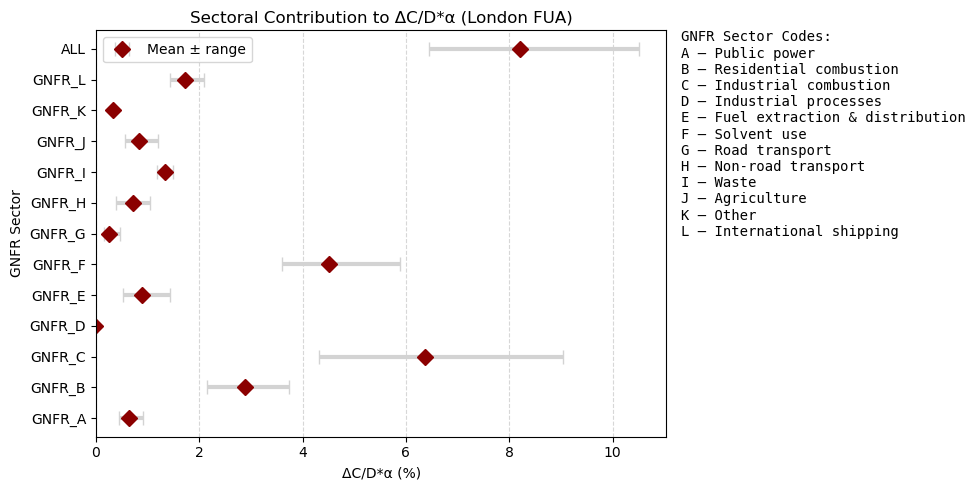

In [16]:
mask_ds = xr.open_dataset("input/reduction_areas/emiRedOn_01005_London_FUA.nc")
mask_raw = mask_ds["AREA"].load()
mask = mask_raw.interp_like(ds["DC_C_alpha_all"], method="nearest")

mask_3d = mask.expand_dims(dim={"GNFRsector": ds.dims["GNFRsector"]}).transpose("GNFRsector", "latitude", "longitude")
dc_C_alpha_snap = ds["DC_C_alpha_snap"].load()
mask_3d = mask_3d.load()
london_snap = dc_C_alpha_snap.where(mask_3d == 1)

mean_london = london_snap.mean(dim=["latitude", "longitude"], skipna=True)
min_london = london_snap.min(dim=["latitude", "longitude"], skipna=True)
max_london = london_snap.max(dim=["latitude", "longitude"], skipna=True)

sectors = [f"GNFR_{chr(65 + i)}" for i in range(len(mean_london))]
df_stats = pd.DataFrame({
    "mean": mean_london.values,
    "min": min_london.values,
    "max": max_london.values
}, index=sectors)

dc_all_vals = ds["DC_C_alpha_all"].where(mask == 1)
df_stats.loc["ALL"] = {
    "mean": dc_all_vals.mean().item(),
    "min": dc_all_vals.min().item(),
    "max": dc_all_vals.max().item()
}

# Prepare figure with two axes: main plot and side text
fig, (ax, ax_legend) = plt.subplots(
    ncols=2, figsize=(10, 5), gridspec_kw={"width_ratios": [3, 1]}
)

# Plot the bar chart with error bars
x = df_stats["mean"]
y = df_stats.index
xerr = [x - df_stats["min"], df_stats["max"] - x]

ax.errorbar(
    x, y, xerr=xerr, fmt='D', color='darkred', ecolor='lightgray',
    elinewidth=3, capsize=5, markersize=8, label='Mean ± range'
)

# Format main axis
ax.set_xlabel("ΔC/D*α (%)")
ax.set_ylabel("GNFR Sector")
ax.set_title("Sectoral Contribution to ΔC/D*α (London FUA)")
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.legend()
ax.set_xlim(left=0)

# Prepare GNFR sector label text
gnfr_legend = "\n".join([
    "GNFR Sector Codes:",
    "A – Public power",
    "B – Residential combustion",
    "C – Industrial combustion",
    "D – Industrial processes",
    "E – Fuel extraction & distribution",
    "F – Solvent use",
    "G – Road transport",
    "H – Non-road transport",
    "I – Waste",
    "J – Agriculture",
    "K – Other",
    "L – International shipping"
])

# Turn off axis for legend box and add text
ax_legend.axis('off')
ax_legend.text(0, 1, gnfr_legend, fontsize=10, va='top', family='monospace')

plt.tight_layout()
plt.show()